<a href="https://colab.research.google.com/github/suafle/Clase2/blob/master/plots_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

! sudo apt-get install dvipng
! sudo apt-get install msttcorefonts -q
! sudo apt-get install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
--2020-06-02 14:02:59--  http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 5.35.249.60
Connecting to mirrors.ctan.org (mirrors.ctan.org)|5.35.249.60|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://mirror.las.iastate.edu/tex-archive/macros/latex/contrib/type1cm.zip [following]
--2020-06-02 14:03:02--  http://mirror.las.iastate.edu/tex-archive/macros/latex/contrib/type1cm.zip
Resolving mir

In [0]:
import time
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from scipy.interpolate import interpn
from scipy.interpolate import interp1d,interp2d,bisplrep,bisplev,Rbf
from scipy.stats import gaussian_kde
from astropy.coordinates import SkyCoord
from astropy.table import Table
from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm,LinearSegmentedColormap

from astropy import units as u
from astropy.io import fits

In [0]:
def BB(Teff,wave,R):
  #wave must be in A
  c = 2.99792e8 #m s^-1
  h = 6.62618e-34 #J s
  k = 1.38066e-23 #J K^-1
  flambda_BB_SI = (2.*np.pi*h*c**2)/((wave*1e-10)**5)*(1./(np.exp(h*c/(wave*1e-10*k*Teff))-1)) # W m^-2 m^-1 (Flux at the surface)
  f = flambda_BB_SI/1e10 #W m**-2 A**-1
  #f = f*(wave**2)/(c*1e10) #W m**-2 Hz**-1
  #f = f*1e26*(2.25e-8/10)**2 #in jansky
  #Change into a luminosity (sun type)
  f = f*4*np.pi*(R)**2 #W/A
  return f

def DS_BB(TDS,eta,bb,wave,Rsun,Tstar):
  bb = (1 - eta)*bb #W/A
  radius = Rsun*(Tstar/TDS)**2 #m
  bbds = eta*BB(TDS,wave,radius) #W/A
  return bbds + bb

In [0]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':23})
rc('text', usetex=True)

In [257]:
wave = np.arange(1000,300000,100)
bb = BB(5778,wave,6.955e8)

#Changing temperature eta 0.5
bb100 = DS_BB(100,0.5,bb,wave,6.955e8,5778)
bb300 = DS_BB(300,0.5,bb,wave,6.955e8,5778)
bb600 = DS_BB(600,0.5,bb,wave,6.955e8,5778)

#Changing eta for a T = 300
bb09 = DS_BB(300,0.9,bb,wave,6.955e8,5778)
bb05 = DS_BB(300,0.5,bb,wave,6.955e8,5778)
bb01 = DS_BB(300,0.1,bb,wave,6.955e8,5778)
bb001 = DS_BB(300,0.01,bb,wave,6.955e8,5778)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


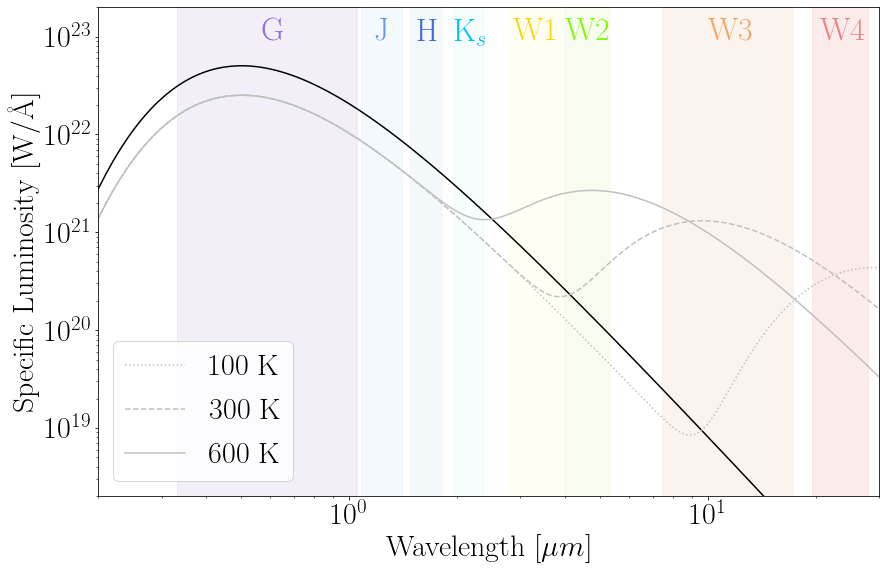

In [258]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(14,9))
plt.plot(wave/10000.,bb,c='k')
plt.plot(wave/10000.,bb100,c='silver',linestyle='dotted',label='100 K')
plt.plot(wave/10000.,bb300,c='silver',linestyle='dashed',label='300 K')
plt.plot(wave/10000.,bb600,c='silver',label = '600 K')

plt.gca().axvspan(3321/10000.,10515/10000.,alpha=0.3,color='#D6CDEA')

plt.gca().axvspan(10806/10000.,14068/10000., alpha=0.2 , color='#CBE4F9')
plt.gca().axvspan(14787/10000.,18231/10000., alpha=0.05)
plt.gca().axvspan(19544/10000.,23552/10000., alpha=0.2, color='#CDF5F6')

plt.gca().axvspan(27541/10000.,38724/10000., alpha=0.2, color='#FEFFBF')
plt.gca().axvspan(39633/10000.,53414/10000., alpha=0.4, color='#EFF9DA')
plt.gca().axvspan(74430/10000.,172613/10000., alpha=0.5, color='#F9EBDF')
plt.gca().axvspan(195201/10000.,279107/10000, alpha=0.5, color='#F9D8D6')

plt.text(5.7e-1, 9e22, r'G', fontsize=32,color='mediumpurple')
plt.text(1.18, 9e22, r'J', fontsize=32,color='cornflowerblue')
plt.text(1.542, 9e22, r'H', fontsize=32,color='royalblue')
plt.text(1.96, 8.1e22, r'K$_s$', fontsize=32,color='deepskyblue')
plt.text(2.85, 9e22, r'W1', fontsize=32,color='gold')
plt.text(4, 9e22, r'W2', fontsize=32,color='lawngreen')
plt.text(10, 9e22, r'W3', fontsize=32,color='sandybrown')
plt.text(20.5, 9e22, r'W4', fontsize=32,color='lightcoral')

plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xlim([2e-1,3e1])
plt.ylim([2e18,2e23])
plt.xlabel(r'Wavelength [$\mu m$]')
plt.ylabel(r'Specific Luminosity [W/\AA]')
plt.show()
plt.close()

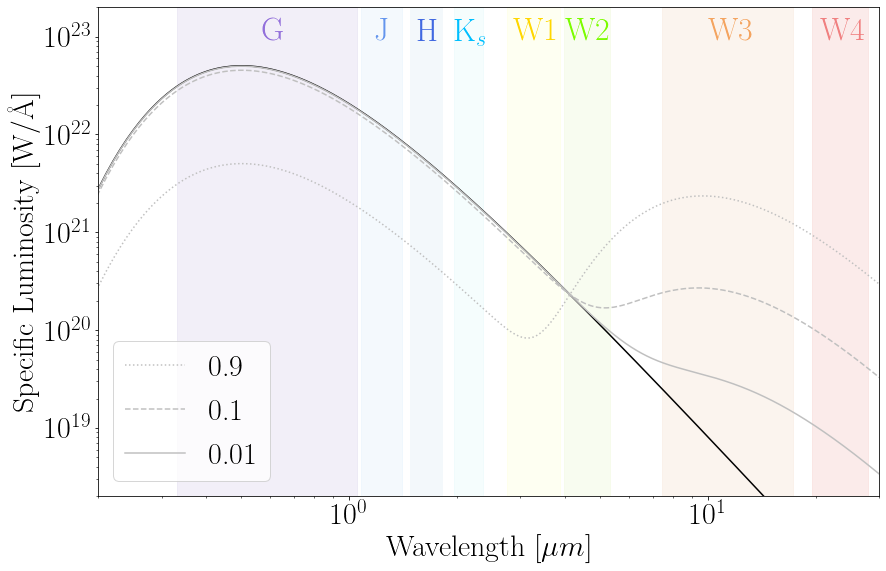

In [262]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=(14,9))
plt.plot(wave/10000.,bb,c='k',)
plt.plot(wave/10000.,bb09,c='silver',label='0.9',linestyle='dotted')
plt.plot(wave/10000.,bb01,c='silver',label='0.1',linestyle='dashed')
plt.plot(wave/10000.,bb001,c='silver',label='0.01')

plt.gca().axvspan(3321/10000.,10515/10000.,alpha=0.3,color='#D6CDEA')

plt.gca().axvspan(10806/10000.,14068/10000., alpha=0.2 , color='#CBE4F9')
plt.gca().axvspan(14787/10000.,18231/10000., alpha=0.05)
plt.gca().axvspan(19544/10000.,23552/10000., alpha=0.2, color='#CDF5F6')

plt.gca().axvspan(27541/10000.,38724/10000., alpha=0.2, color='#FEFFBF')
plt.gca().axvspan(39633/10000.,53414/10000., alpha=0.4, color='#EFF9DA')
plt.gca().axvspan(74430/10000.,172613/10000., alpha=0.5, color='#F9EBDF')
plt.gca().axvspan(195201/10000.,279107/10000, alpha=0.5, color='#F9D8D6')

plt.text(5.7e-1, 9e22, r'G', fontsize=32,color='mediumpurple')
plt.text(1.18, 9e22, r'J', fontsize=32,color='cornflowerblue')
plt.text(1.542, 9e22, r'H', fontsize=32,color='royalblue')
plt.text(1.96, 8.1e22, r'K$_s$', fontsize=32,color='deepskyblue')
plt.text(2.85, 9e22, r'W1', fontsize=32,color='gold')
plt.text(4, 9e22, r'W2', fontsize=32,color='lawngreen')
plt.text(10, 9e22, r'W3', fontsize=32,color='sandybrown')
plt.text(20.5, 9e22, r'W4', fontsize=32,color='lightcoral')

plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xlim([2e-1,3e1])
plt.ylim([2e18,2e23])
plt.xlabel(r'Wavelength [$\mu m$]')
plt.ylabel(r'Specific Luminosity [W/\AA]')
plt.show()
plt.close()